# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
train = pd.read_csv("E:/notes/Msc DS/PROJECTS/python/Kaggle/Titanic/train.csv")
test = pd.read_csv("E:/notes/Msc DS/PROJECTS/python/Kaggle/Titanic/test.csv")

In [4]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dividing categorical and numerical variables

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450


In [83]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.578193,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.324631,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_num = train.loc[:,['Age','SibSp','Fare','Parch']]
train_cat = train.loc[:,['Survived','Pclass','Sex','Cabin','Embarked']]

# Plot

## Numerical Data

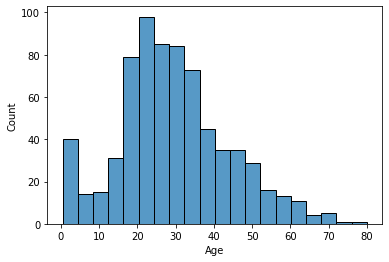

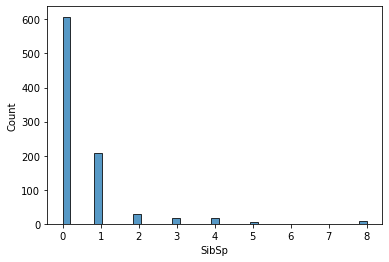

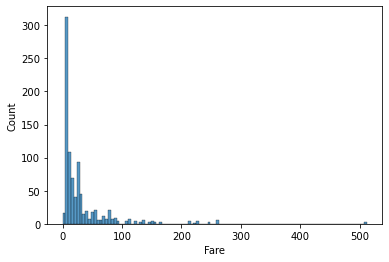

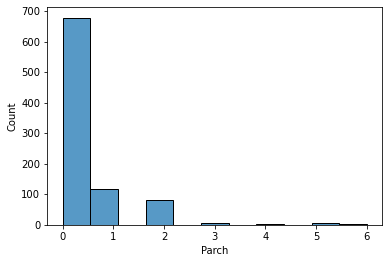

In [7]:
for i in train_num:
    sns.histplot(data = train,x=i)
    plt.show()

In [8]:
train_num.corr()

,Age,SibSp,Fare,Parch
Age,1.000000,-0.308247,0.096067,-0.189119
SibSp,-0.308247,1.000000,0.159651,0.414838
Fare,0.096067,0.159651,1.000000,0.216225
Parch,-0.189119,0.414838,0.216225,1.000000


<AxesSubplot:>

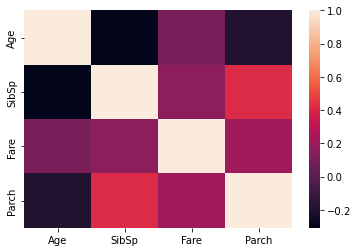

In [9]:
sns.heatmap(train_num.corr())

In [10]:
for i in train_num:
    print(train[[i,'Survived']].groupby('Survived',as_index=False).mean())

   Survived        Age
0         0  30.626179
1         1  28.343690
   Survived     SibSp
0         0  0.553734
1         1  0.473684
   Survived       Fare
0         0  22.117887
1         1  48.395408
   Survived     Parch
0         0  0.329690
1         1  0.464912


## Categorical Data

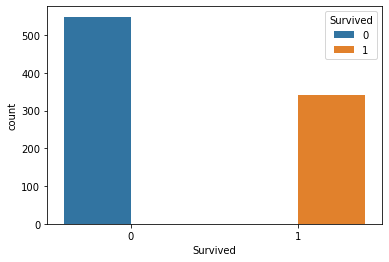

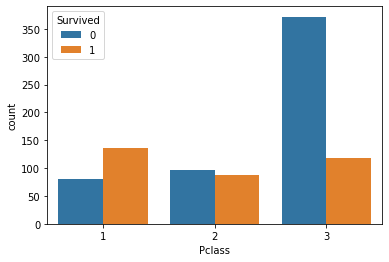

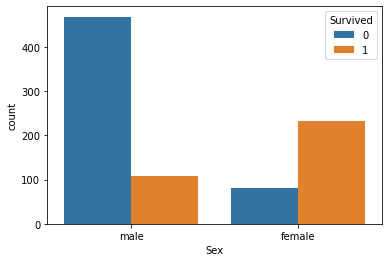

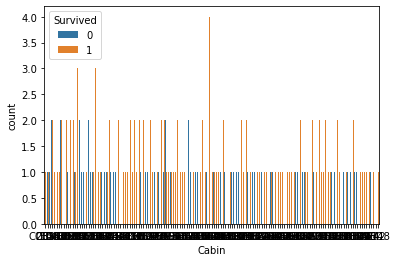

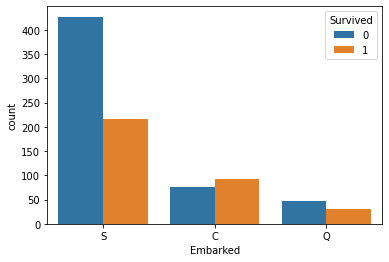

In [11]:
for i in train_cat:
    sns.countplot(data=train,x=i,hue='Survived')
    plt.show()

## Handelling the Nan Values

In [12]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

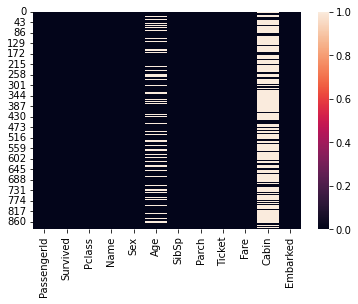

In [13]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

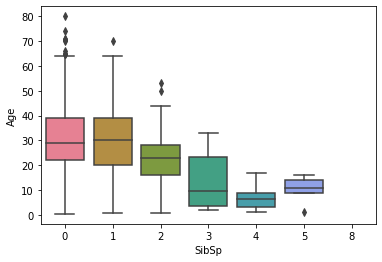

In [14]:
sns.boxplot(data=train,x='SibSp',y='Age',palette='husl')

In [15]:
train[['Age','SibSp']].groupby('SibSp',as_index=False).mean()

,SibSp,Age
0,0,31.397558
1,1,30.089727
2,2,22.620000
3,3,13.916667
4,4,7.055556
5,5,10.200000
6,8,NaN


Defining function to fill the Nans in Age

In [16]:
def fill_age(train):
    for i in range(train.shape[0]):
        Age = train.loc[i, 'Age']
        if np.isnan(Age):
            if train.loc[i, 'SibSp'] == 0:
                train.loc[i, 'Age'] = 31
            elif train.loc[i, 'SibSp'] == 1:
                train.loc[i, 'Age'] = 30
            elif train.loc[i, 'SibSp'] == 2:
                train.loc[i, 'Age'] = 22
            elif train.loc[i, 'SibSp'] == 3:
                train.loc[i, 'Age'] = 14
            elif train.loc[i, 'SibSp'] == 4:
                train.loc[i, 'Age'] = 7
            elif train.loc[i, 'SibSp'] == 5:
                train.loc[i, 'Age'] = 10
            else:
                train.loc[i, 'Age'] = 0
    return train

In [17]:
# TEST set
def fill_age(test):
    for i in range(test.shape[0]):
        Age = test.loc[i, 'Age']
        if np.isnan(Age):
            if train.loc[i, 'SibSp'] == 0:
                train.loc[i, 'Age'] = 31
            elif train.loc[i, 'SibSp'] == 1:
                train.loc[i, 'Age'] = 30
            elif train.loc[i, 'SibSp'] == 2:
                train.loc[i, 'Age'] = 22
            elif train.loc[i, 'SibSp'] == 3:
                train.loc[i, 'Age'] = 14
            elif train.loc[i, 'SibSp'] == 4:
                train.loc[i, 'Age'] = 7
            elif train.loc[i, 'SibSp'] == 5:
                train.loc[i, 'Age'] = 10
            else:
                train.loc[i, 'Age'] = 0
    return train

In [18]:
fill_age(train).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Age', ylabel='Count'>

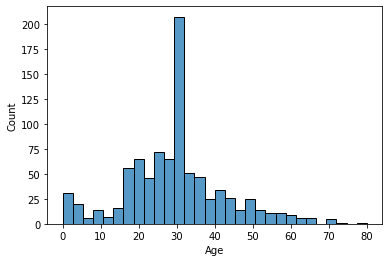

In [19]:
sns.histplot(data=train,x='Age')

Filling Nans of Embarked

In [20]:
for i in range(train.shape[0]):
    Embarked = train.loc[i,'Embarked']
    if pd.isnull(Embarked):
        train.loc[i,'Embarked'] = 'C'

In [21]:
# TEST set
for i in range(test.shape[0]):
    Embarked = test.loc[i,'Embarked']
    if pd.isnull(Embarked):
        test.loc[i,'Embarked'] = 'C'

In [22]:
train[['Fare','Embarked']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Fare
0,C,60.189978
1,Q,13.276030
2,S,27.079812


<AxesSubplot:>

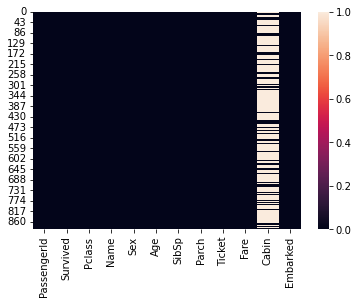

In [23]:
sns.heatmap(train.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


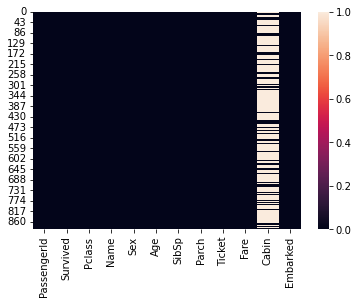

In [25]:
sns.heatmap(pd.isnull(train))
train.info()

# Extracting New Variables

Extracting numerical values from Ticket row:

In [81]:
a=[]
for i in range(train.shape[0]):
    Ticket = train.loc[i,'Ticket']
    b = Ticket.split(' ')
    if len(b) == 1:
        a.append(b[0])
    elif :
        a=0
    elif len(b) == 3:
        a.append(b[2])
    else:
        a.append(b[1])
train['Ticket_num'] = a
train.head()

SyntaxError: invalid syntax (2904371135.py, line 7)

In [78]:
train[['Survived','Ticket_num']].groupby('Ticket_num',as_index=False).mean()

,Ticket_num,Survived
0,10482,1.000000
1,110152,1.000000
2,110413,0.666667
3,110465,0.000000
4,110564,1.000000
...,...,...
674,8475,0.000000
675,851,0.000000
676,9234,1.000000
677,9549,1.000000


<AxesSubplot:xlabel='Ticket_num', ylabel='Survived'>

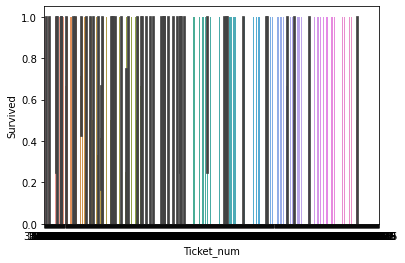

In [65]:
sns.barplot(data=train,x='Ticket_num',y='Survived')

Now, dropping the Cabin column

In [24]:
train = train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

We dropped down all unnescesary columns

# Dummy variable

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,Sex,Embarked],axis=1)

In [47]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

# Model fitting

In [48]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Splitting Data

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
X = train.iloc[:,[1,2,3,4,5,6,7,8]]
y= train.iloc[:,0]

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Logistic Model

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#logreg.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
print('Accuracy of logistice model is:',logreg.score(X_test,y_test))

Accuracy of logistice model is: 0.8100558659217877


## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [55]:
#GNB.predict(X_test)
GNB.score(X_test,y_test)

0.7653631284916201

## KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
knn.score(X_test,y_test)

0.7150837988826816

## Descision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
Dtree = DecisionTreeClassifier()

In [62]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dtree.score(X_test,y_test)

# SVC

In [64]:
from sklearn.svm import SVC

In [65]:
SVC = SVC()

In [66]:
SVC.fit(X_train,y_train)

SVC()

In [68]:
SVC.score(X_test,y_test)

0.6536312849162011